### WeightNormalization

A Simple Reparameterization to Accelerate Training of Deep Neural Networks

In [1]:
!pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1MB 4.6MB/s 


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from matplotlib import pyplot as plt

In [3]:
batch_size = 32
epochs = 10
num_classes = 10

In [4]:
# Standard ConvNet
reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, 5, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(84, activation = 'relu'),
    tf.keras.layers.Dense(num_classes, activation = 'softmax'),
])

# WeightNorm ConvNet
wn_model = tf.keras.Sequential([
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(6, 5, activation = 'relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(16, 5, activation = 'relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(120, activation = 'relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(84, activation = 'relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(num_classes, activation = 'softmax')),
])

In [5]:
# Load Data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 4s 0us/step


In [6]:
# Train Models

reg_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

reg_history = reg_model.fit(x_train, y_train,
                            batch_size = batch_size,
                            epochs = epochs,
                            validation_data = (x_test, y_test),
                            shuffle = True)

wn_model.compile(optimizer = 'adam', 
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

wn_history = wn_model.fit(x_train, y_train,
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (x_test, y_test),
                          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6224 - accuracy: 0.4075 - val_loss: 1.4023 - val_accuracy: 0.4970
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3497 - accuracy: 0.5145 - val_loss: 1.3382 - val_accuracy: 0.5145
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2430 - accuracy: 0.5569 - val_loss: 1.2170 - val_accuracy: 0.5679
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1727 - accuracy: 0.5812 - val_loss: 1.2186 - val_accuracy: 0.5654
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1154 - accuracy: 0.6028 - val_loss: 1.1758 - val_accuracy: 0.5831
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0664 - accuracy: 0.6204 - val_loss: 1.1396 - val_accuracy: 0.6008
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0241 - accuracy: 0.6372 - val_loss: 1.1190 - val_accuracy:

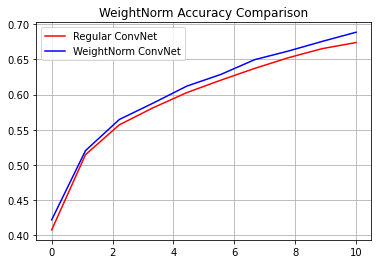

In [7]:
reg_accuracy = reg_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']

plt.plot(np.linspace(0, epochs,  epochs), reg_accuracy,
             color = 'red', label = 'Regular ConvNet')

plt.plot(np.linspace(0, epochs, epochs), wn_accuracy,
         color = 'blue', label = 'WeightNorm ConvNet')

plt.title('WeightNorm Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()